# Classifiers

## Libraries

In [1]:
import matplotlib.pyplot as plt
from seaborn import pairplot
from seaborn import set as sns_set

from context import *
from util.classifiers import *
from util.dfmgmt import initSet, wrangle

## Plot characteristics and global variables

In [2]:
sns_set(style="whitegrid", font_scale=1)
%matplotlib inline

target = 'charted'  # main feature to be predicted
bestFeatures = ['density', 'unique_words', 'sentiment', 'explicit']

## Import dataset

In [3]:
df = initSet()
df = df[df['decade'] != 2010]

In [4]:
# Check head
df.head(10)

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_term,most_used_freq,explicit,total_curses,reading_score,sentiment,charted
0,1961,1960,36,72,65,158,34,30,10,70,rose,7,0,0,2.367848,0.9901,0
1,1961,1960,45,91,74,197,45,37,19,81,name,6,0,0,2.771777,0.9712,1
2,1961,1960,54,103,88,223,45,48,17,98,babi,10,0,0,3.885650,0.9974,1
3,1961,1960,42,148,66,263,81,61,36,76,love,24,0,0,2.889886,0.9993,1
4,1961,1960,28,131,60,354,56,77,5,57,come,38,0,0,2.940000,0.9812,1
5,1961,1960,50,105,79,181,39,40,24,80,mari,13,0,0,3.135470,0.9744,1
6,1961,1960,39,75,70,160,28,35,21,81,take,13,0,0,3.503750,0.9978,1
7,1961,1960,50,94,78,190,62,17,8,83,never,6,0,0,3.074737,-0.9791,1
8,1961,1960,53,63,92,166,25,41,18,105,one,4,0,0,4.993855,-0.2263,1
9,1961,1960,48,57,79,124,29,24,7,83,river,5,0,0,4.648387,-0.3400,1


## Try without time features

In [5]:
# Drop both year and decade
dropList = ['most_used_term']
removeList = ['decade', 'year', 'charted']

df, features = wrangle(df, dropList, removeList, True)

df.head()

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_freq,explicit,total_curses,reading_score,sentiment,charted
0,1961,1960,36,72,65,158,34,30,10,70,7,0,0,2.367848,0.9901,0
1,1961,1960,45,91,74,197,45,37,19,81,6,0,0,2.771777,0.9712,1
2,1961,1960,54,103,88,223,45,48,17,98,10,0,0,3.885650,0.9974,1
3,1961,1960,42,148,66,263,81,61,36,76,24,0,0,2.889886,0.9993,1
4,1961,1960,28,131,60,354,56,77,5,57,38,0,0,2.940000,0.9812,1


In [6]:
X = df[features]
y = df[target]

model = Classifiers(X, y)

In [7]:
model.initProc()

In [8]:
model.defaultParams()

Clasifiers with default parameters:

K Neighbors
Accuracy: 0.664
ROC AUC: 0.698

Decision Tree
Accuracy: 0.637
ROC AUC: 0.629

Random Forest
Accuracy: 0.691
ROC AUC: 0.729

Logistic Regression
Accuracy: 0.727
ROC AUC: 0.773



In [9]:
model.gridSearch()

Grid searching for best parameters:

K Neighbors
Best Params: {'n_neighbors': 64}
Accuracy of current clf: 0.664
Accuracy using best param: 0.691

Logistic Regression
Best Params: {'C': 0.03125}
Accuracy of current clf: 0.727
Accuracy using best param: 0.711

Random Forest
Best Params: {'n_estimators': 32}
Accuracy of current clf: 0.691
Accuracy using best param: 0.710

Decision Tree
Best Params: {'max_depth': 1}
Accuracy of current clf: 0.637
Accuracy using best param: 0.682



# Instantiate models

In [10]:
# Update model params
model.updateParams()

K Neighbors doesn't have feature importance.

Decision Tree


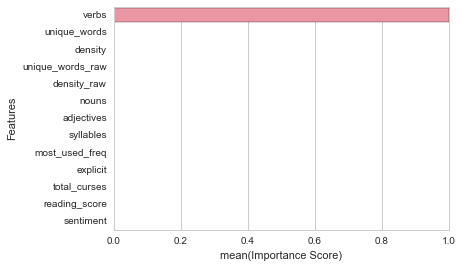

Random Forest


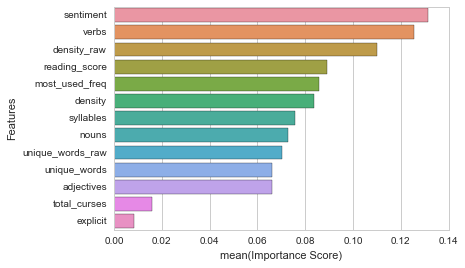

Logistic Regression doesn't have feature importance.



In [11]:
model.plotModels()

In [12]:
model.getBestParams('best_param_no_time.txt')

Best clf is Logistic Regression with {'C': 0.03125}


# Try with the time feature

In [13]:
df = initSet()
df = df[df['decade'] != 2010]

# Keep both year and decade
dropList = ['most_used_term']
removeList = ['charted', 'decade']

df, features = wrangle(df, dropList, removeList, True)

df.head()

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_freq,explicit,total_curses,reading_score,sentiment,charted
0,1961,1960,36,72,65,158,34,30,10,70,7,0,0,2.367848,0.9901,0
1,1961,1960,45,91,74,197,45,37,19,81,6,0,0,2.771777,0.9712,1
2,1961,1960,54,103,88,223,45,48,17,98,10,0,0,3.885650,0.9974,1
3,1961,1960,42,148,66,263,81,61,36,76,24,0,0,2.889886,0.9993,1
4,1961,1960,28,131,60,354,56,77,5,57,38,0,0,2.940000,0.9812,1


In [14]:
X = df[features]
y = df[target]

model = Classifiers(X, y)

In [15]:
model.initProc()

In [16]:
model.defaultParams()

Clasifiers with default parameters:

K Neighbors
Accuracy: 0.768
ROC AUC: 0.816

Decision Tree
Accuracy: 0.718
ROC AUC: 0.711

Random Forest
Accuracy: 0.779
ROC AUC: 0.831

Logistic Regression
Accuracy: 0.728
ROC AUC: 0.776



In [17]:
model.gridSearch()

Grid searching for best parameters:

K Neighbors
Best Params: {'n_neighbors': 16}
Accuracy of current clf: 0.768
Accuracy using best param: 0.793

Logistic Regression
Best Params: {'C': 256}
Accuracy of current clf: 0.728
Accuracy using best param: 0.730

Random Forest
Best Params: {'n_estimators': 1024}
Accuracy of current clf: 0.779
Accuracy using best param: 0.811

Decision Tree
Best Params: {'max_depth': 4}
Accuracy of current clf: 0.718
Accuracy using best param: 0.788



In [18]:
# Update model params
model.updateParams()

K Neighbors doesn't have feature importance.

Decision Tree


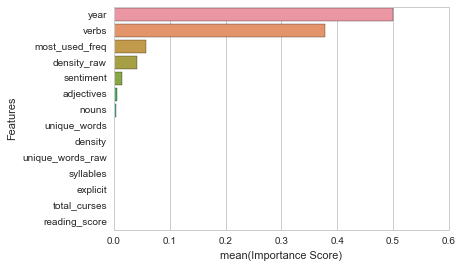

Random Forest


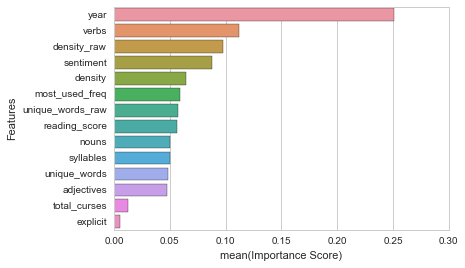

Logistic Regression doesn't have feature importance.



In [19]:
model.plotModels()

In [20]:
model.getBestParams('best_param_time.txt')

Best clf is Random Forest with {'n_estimators': 1024}


In [21]:
from util.polarize import *
df = initSet()
df = df[df['decade'] != 2010]

# Keep both year and decade
dropList = ['most_used_term']
removeList = ['charted', 'decade']
bestFeatures[bestFeatures.index('sentiment')] = 'sentiment_polarity'

df = wrangle(df, dropList, removeList)
df['sentiment_polarity'] = df.apply(sentiment, axis=1)
df.head()

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_freq,explicit,total_curses,reading_score,sentiment,charted,sentiment_polarity
0,1961,1960,36,72,65,158,34,30,10,70,7,0,0,2.367848,0.9901,0,1
1,1961,1960,45,91,74,197,45,37,19,81,6,0,0,2.771777,0.9712,1,1
2,1961,1960,54,103,88,223,45,48,17,98,10,0,0,3.885650,0.9974,1,1
3,1961,1960,42,148,66,263,81,61,36,76,24,0,0,2.889886,0.9993,1,1
4,1961,1960,28,131,60,354,56,77,5,57,38,0,0,2.940000,0.9812,1,1


In [22]:
X = df[bestFeatures]
y = df[target]

model = Classifiers(X, y)

In [23]:
model.initProc()

In [24]:
model.defaultParams()

Clasifiers with default parameters:

K Neighbors
Accuracy: 0.627
ROC AUC: 0.639

Decision Tree
Accuracy: 0.589
ROC AUC: 0.583

Random Forest
Accuracy: 0.624
ROC AUC: 0.654

Logistic Regression
Accuracy: 0.678
ROC AUC: 0.713



In [25]:
model.gridSearch()

Grid searching for best parameters:

K Neighbors
Best Params: {'n_neighbors': 64}
Accuracy of current clf: 0.627
Accuracy using best param: 0.662

Logistic Regression
Best Params: {'C': 0.0625}
Accuracy of current clf: 0.678
Accuracy using best param: 0.687

Random Forest
Best Params: {'n_estimators': 256}
Accuracy of current clf: 0.624
Accuracy using best param: 0.637

Decision Tree
Best Params: {'max_depth': 4}
Accuracy of current clf: 0.589
Accuracy using best param: 0.675



In [26]:
# Update model params
model.updateParams()

K Neighbors doesn't have feature importance.

Decision Tree


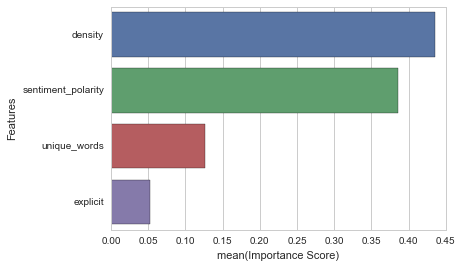

Random Forest


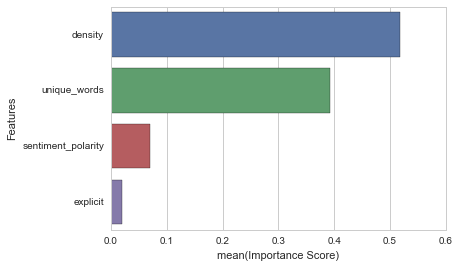

Logistic Regression doesn't have feature importance.



In [27]:
model.plotModels()

In [28]:
model.getBestParams('default_best_param.txt')

Best clf is Logistic Regression with {'C': 0.0625}
